# <center> Ridge Regression, Linear Regression and PCA<center>

<center> Data Science 1 - Final Assignment <center>
<center>Created by Zsófia Rebeka Katona<center>

    ---

The goal of this assignment is to explore the concepts of ridge regression, principal component analysis (PCA) in the context of predictive modeling. Moreover, we will discover how the parameters of a linear regression change in a given scenario. 

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

## 1. Ridge Regression Analysis
---

In [12]:
# Setting the random seed
np.random.seed(20240315)

# Settings
n = 20
sigma = 1.0
beta_zero = 1
epsilon = np.random.normal(loc = 0, scale = sigma, size = n)
Y = beta_zero + epsilon

# Creating the estimator for the OLS model
beta_ols = np.mean(Y)

# Defining the Ridge Estimator function
def ridge_estimator(n, alpha):
    n = len(Y)
    return np.sum(Y)/(n + alpha)

# Defining a nonzero lambda
alpha_ridge = 1.0

# Calculating the Ridge Estimator
beta_ridge = ridge_estimator(n, alpha_ridge)

# Comparing the two values
print(f"The OLS Estimator is {beta_ols:.3f}")
print(f"The Ridge Estimator is {beta_ridge:.3f}, when lambda is {alpha_ridge}")

The OLS Estimator is 1.013
The Ridge Estimator is 0.964, when lambda is 1.0


#### a, How does the regularized estimator (predictor) βˆridge compare with the OLS estimator?
- The Ridge Estimator is expected to be smaller as we apply a penalty term and the coefficient will be be smaller. 
- The penalty term shrinks the coefficients close to 0. Introducing a penalty term results in a shinkrage effect on the coefficient estimates.
- The higher the penalty term, the more the coefficients shrink towards 0.

#### b, Suppose that β0 = 1 and ϵ ∼ N(0, σ2) with σ2 = 4. Generate a sample of size n = 20 from the model and compute the predicted value Yˆ = ˆf(x) = βˆridge 0 for a grid of λ values over the interval [0, 20].

In [13]:
# Settings for exercise b
sigma = 2
epsilon = np.random.normal(loc = 0, scale = sigma**2, size = n)

Y = beta_ridge + epsilon

# Setting the lambda from 0 to 20 with increments of 0.5
alphas_to_try = np.arange(0.5, 20, 0.5)

# Creating an empty array
results = []

# Defining a for loop to calculate the estimated values
for alpha in alphas_to_try:
    beta_ridge = ridge_estimator(n, alpha)
    results.append(beta_ridge)

# Creating a DataFrame to display the values
alpha_results = pd.DataFrame({
    "Alphas" : alphas_to_try,
    "Estimated values" : results
})

alpha_results

,Alphas,Estimated values
0,0.5,1.620710
1,1.0,1.582122
2,1.5,1.545328
3,2.0,1.510207
4,2.5,1.476647
5,3.0,1.444546
6,3.5,1.413811
7,4.0,1.384357
8,4.5,1.356104
9,5.0,1.328982


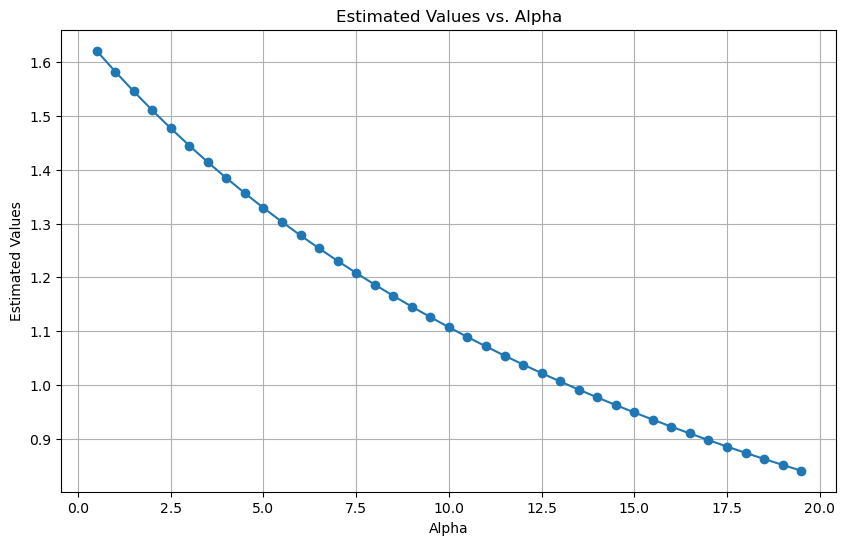

In [14]:
# Extracting the values from the DataFrame
alpha_plot = alpha_results['Alphas']
y_values_plot = alpha_results['Estimated values']

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(alpha_plot, y_values_plot, marker='o', linestyle='-')
plt.title('Estimated Values vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Estimated Values')
plt.grid(True)
plt.show()

#### c,  Repeat part b), say, 1000 times so that you end up with 1000 estimates of β0 for all the λ values that you have picked. For each value of λ, compute bias2 [βˆridge0], Var[βˆridge0] and MSE[βˆridge0] = bias2[βˆridge0] + Var[βˆridge0].

In [15]:
R = 1000
epsilon = np.random.normal(loc = 0, scale = sigma**2, size = (R, n))

# Creating empty arrays to store the results
estimated_results = np.empty((R, len(alphas_to_try)))
bias_sq = np.empty(len(alphas_to_try))
var = np.empty(len(alphas_to_try))
mse = np.empty(len(alphas_to_try))

# Creating a for loop for the 1000 estimates
# 'i' stands for the number of iterations and 'j' represents the lambas' index
for i in range(R):
    epsilon = np.random.normal(0, sigma, size = n)
    Y = beta_zero + epsilon
    for j, alpha in enumerate(alphas_to_try):
        beta_ridge = ridge_estimator(n, alpha)
        estimated_results[i, j] = beta_ridge
results
    
# Calculating the bias squared, variance and mse results
bias = np.mean(estimated_results - beta_zero, axis = 0)

# Calculating the mean of estimated_results
estimated_mean = np.mean(estimated_results, axis=0)

# Calculating the variance using the formula
variance = np.mean((estimated_results - estimated_mean) ** 2, axis=0)

# Calculating the mse
mse = np.mean(((estimated_results - beta_zero)**2), axis = 0)
bias, variance, mse

(array([-0.03663275, -0.05957007, -0.08144053, -0.10231688, -0.12226539,
        -0.14134658, -0.1596158 , -0.17712381, -0.1939172 , -0.21003886,
        -0.22552829, -0.24042198, -0.25475364, -0.2685545 , -0.2818535 ,
        -0.29467755, -0.30705163, -0.31899901, -0.3305414 , -0.34169905,
        -0.35249086, -0.36293456, -0.37304671, -0.38284286, -0.39233758,
        -0.40154459, -0.41047676, -0.41914622, -0.42756439, -0.43574204,
        -0.44368933, -0.45141587, -0.45893072, -0.46624247, -0.47335924,
        -0.48028872, -0.48703822, -0.49361465, -0.50002459]),
 array([0.19222555, 0.18318092, 0.17475995, 0.16690659, 0.15957094,
        0.15270848, 0.14627938, 0.14024789, 0.1345819 , 0.12925246,
        0.12423343, 0.11950116, 0.11503423, 0.11081315, 0.10682021,
        0.10303927, 0.09945557, 0.09605563, 0.0928271 , 0.08975865,
        0.08683987, 0.08406117, 0.08141374, 0.07888944, 0.07648075,
        0.0741807 , 0.07198288, 0.0698813 , 0.06787044, 0.06594513,
        0.0641006 ,

<function matplotlib.pyplot.show(close=None, block=None)>

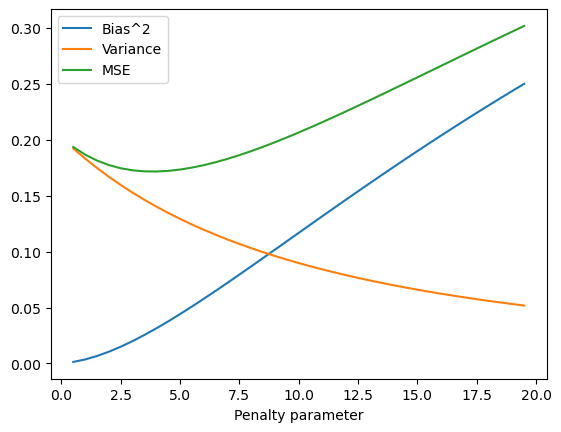

In [16]:
plt.plot(alphas_to_try, bias**2, label = "Bias^2")
plt.plot(alphas_to_try, variance, label = "Variance")
plt.plot(alphas_to_try, mse, label = "MSE")
plt.xlabel('Penalty parameter')
plt.legend()
plt.show

#### Can a ridge regression give a better prediction than OLS?
Based on the plot, a Ridge regression appears to offer a worse prediction compared to OLS, as indicated by the increasing trend in the MSE values across different values of lambda. This means that adding a penalty term in this dataset doesn't improve the predictive performance compared to the OLS regression. Therefore, a simpler OLS model might provide better prediction results. However, in other datasets - like in the example in class-, Ridge Regression can have a better predictive performance compared to OLS.

## 2. Linear regression
---
 Suppose we estimate the regression coefficients in a linear regression
model by minimizing

$$\sum_{i=1}^{n} \left( y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2$$
subject to $$\sum_{j=1}^{p} |\beta_j| \leq s$$

the function provided for a particular value of *s*. For parts (a) through (e), indicate which
of \( i. \) through \( v. \) is correct. Justify your answer.

- (a) As we increase *s* from 0, the training RSS will:
    - \( i. \) Increase initially, and then eventually start decreasing in an inverted U shape.
    - \( ii. \) Decrease initially, and then eventually start increasing in a U shape.
    - \( iii. \) Steadily increase.
    - \( iv. \) Steadily decrease.
    - \( v. \) Remain constant.
- (b) Repeat (a) for test RSS.
- (c) Repeat (a) for variance.
- (d) Repeat (a) for (squared) bias.
- (e) Repeat (a) for the irreducible error.
---

### Answer:
We want to understand how the training residual sum of squares (RSS), test RSS, variance, squared bias and irreducibel error change as we change the regularization parameter in a linear regression model. *s* in this case refers to the complexity of our f function.

(a) Training RSS: Initially, our model has a high training RSS and regularized heavily, suggesting that it's an underfit. As s increases, the model becomes less regularized, and RSS decreases. This implies that the model fits on the training data better. However, if we increase s further, our model might become an ovefit, resulting in an increase of training RSS. In this case, scenario ( ii. ) will occur: The training RSS decreases initially, and then eventually start increasing in a u shape.

(b) Test RSS: Test RSS performs similar to the training RSS. With a small complexity, our model underpredicts and obtains a higher test RSS. As s increases, the model becomes better at capturing patterns and regularizing, and RSS decreases. However, only until a certain point, because as s becomes too large, our model will be an overfit, and the RSS will increase again. Case ( ii. )

(c) Variance: As our s increases, the variance in our model steadily increases. As the complexity of our model increases, it captures more variance and more complex relationship between predictor variables and target variable. In this case, we can opt for ( iii. )

(d) (Squared) bias: As s increases, our model becomes more complex. This increased flexibility decreases the bias in our model. While s is low, our model is expected to be an underfit with large bias. But the more pattern our model captures, the less bias will it obtain. In the case bias, ( iv. ) is true. This model represents the trade-off well between bias and variance.

(e) Irreducible error: The irreducible error remains constant regardless of the value of s or any other parameter. It represents the inherent variability in the target variable that cannot be reduced by any model, no matter how well-fitted or complex it is. This error is usually caused by factors that are outside of the scope of our model, for instance, random noise. Hence, we opt for ( v. ) in the case of irreducible errors.

## 3. Principal Component Analysis (PCA):
---

#### 3. Consider the ’dense’ regression model discussed in the last lecture: Yi = β0 + β1X1i + β2X2i + . . . + β50X50,i + ϵi, where X1, . . . , X50 are correlated jointly normal random variables, ϵ ∼ N(0, 22), and the regression coefficients are arbitrarily chosen numbers between 0 and 1 (not shown). The file PCA data.csv contains a training sample of size n = 500 and a test sample of size m = 500 generated from this model. The exercise below asks you to do the exercise that produces the last column of the ’Dense DGP’ table on slide 22, Lecture 3.


In [6]:
# Loading the data set
data = pd.read_csv('PCA_data.csv')
data

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,-6.539179,0.948014,1.259177,0.763472,0.128735,0.410222,0.420989,-0.101123,-1.242581,0.029933,...,-0.859282,-1.645036,-0.247500,1.372374,-0.212618,-1.368046,-1.740719,0.925212,0.123907,-1.020763
1,2.036508,0.019661,-1.951131,-1.097787,0.919061,-0.069719,0.405042,1.808955,-0.343013,1.465924,...,-1.809128,0.381091,0.497534,0.632532,-1.429868,-2.092106,0.499216,1.026407,-0.763639,-0.405548
2,7.295433,0.283019,1.127620,1.458154,0.227844,-2.003859,-1.775359,-2.480777,0.506680,0.852822,...,0.091664,0.655664,-0.191965,1.194055,0.326962,0.399151,0.723069,0.939017,-1.132469,0.212292
3,6.825405,0.845641,-0.921489,-1.368601,2.085195,-0.294420,1.029018,0.098418,-0.677591,-1.276767,...,-0.280935,-0.523440,-0.230028,1.939640,-0.429125,0.701319,-1.008541,1.055334,-0.782659,0.749695
4,-0.176432,0.566670,0.667277,-0.248455,1.361258,0.041326,0.149155,-0.271543,0.229179,0.089760,...,-0.728898,-0.124473,-0.842829,-0.132558,-0.236122,-0.751535,0.191009,0.007180,-0.350858,0.384321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.298207,1.152532,0.610173,2.956214,-1.432405,-2.397398,-0.945650,-0.952754,-0.825043,0.508768,...,1.263616,1.249821,0.778397,-0.360644,1.407061,1.214776,0.113185,-1.092583,-0.705830,-0.492108
996,2.334896,-0.434171,-0.293504,-1.437907,-0.106369,1.617408,1.136066,0.214231,0.032185,-2.389823,...,-0.334054,0.202016,-0.348515,1.547892,-0.924954,-0.393573,0.810303,-0.265939,0.290818,0.370616
997,-1.049071,-1.474982,-0.437761,-0.264495,-1.270952,0.129644,-0.668138,-0.298138,1.466069,-1.368111,...,0.424773,0.706320,-0.098820,-0.281987,0.727978,0.530025,0.860666,1.001294,0.159725,0.409749
998,-6.145876,0.349684,-0.670108,0.161680,-0.250096,-0.658828,-0.076775,-0.338317,-1.390537,-0.565669,...,1.377252,-0.221610,0.200315,0.616052,1.238358,0.175405,1.963846,-1.160791,-0.170900,-0.414812


In [7]:
# Splitting the data and designating the training and the test sample
train_sample = data[:500]
test_sample = data[-500:]

#### b) Compute the first 10 principal component vectors and the corresponding scores Z∗1 , . . . , Z∗ 10 for (X1, X2, . . . , X50). For simplicity, you can use the whole data set for this (both the training sample as well as the test sample).

In [8]:
# Applying PCA and calculating the principal components as X_pca
pca = PCA()

# Calculating all the principal component scores
X_pca = pca.fit_transform(data)

In [9]:
# Computing the first 10 principal component vectors
pca_vectors = pca.components_[:10]

#### c) Estimate an OLS regression of Y on a constant and X1, . . . , X50 over the training sample. Estimate OLS regressions of Y on a constant and Z∗1, . . . , Z∗k over the training sample for k = 1, 5, 10.

In [10]:
# Assuming that Y is the target variable, we are dropping it
X_train = train_sample.drop('Y', axis = 1)
X_test = test_sample.drop('Y', axis = 1)

# Setting Y as a new variable
y_train = train_sample['Y']
y_test = test_sample['Y']

# We are fitting it on the training sets
ols_on_X = LinearRegression().fit(X_train, y_train)

In [11]:
# Iniating an empty list for the results
results = []

# Predicting without the PCA and calculating the MSPE
prediction_ols = ols_on_X.predict(X_train)
mspe_ols = np.mean((prediction_ols - y_test)**2)

# Appending it to the results table
results.append({'Model': f"OLS", "MSPE" : mspe_ols})

# Printing the results
print('OLS regression without applying PCA:')
print(' ')
print(f'The Intercept is {ols_on_X.intercept_}.')
print(f'The MSPE is {mspe_ols}.')
print('-'*50)
print(' ')

# Defining a list for the k values
k_to_try = [1, 5, 10]

# Calculating all the principal component scores
X_train_pca = pca.fit_transform(X_train)

# Defining a for loop for the k values
for k in k_to_try:
    
    # Extracting the first k components
    X_train_pca_k = X_train_pca[:, :k]
    # Fitting the model
    ols_on_pca = LinearRegression().fit(X_train_pca_k, y_train)
    
    # Calculating the MSPE
    prediction_pca = ols_on_pca.predict(X_train_pca_k)
    mspe_pca = np.mean((prediction_pca - y_test)**2)
    
    # Appending the results to the list
    results.append({'Model': f"PCA (k = {k})", "MSPE" : mspe_pca})
    
    # Printing the results
    print(f'k = {k}.')
    print(f'The coefficients are: {ols_on_pca.coef_}.')
    print(f'The Intercept is {ols_on_pca.intercept_}.')
    print(f'The MSPE for k = {k} value is {mspe_pca}.')
    print('-'*50)
    print(' ')


OLS regression without applying PCA:
 
The Intercept is 0.9368192754190612.
The MSPE is 23.528930608001616.
--------------------------------------------------
 
k = 1.
The coefficients are: [0.01687943].
The Intercept is 1.0331068182440002.
The MSPE for k = 1 value is 15.026864642641463.
--------------------------------------------------
 
k = 5.
The coefficients are: [ 0.01687943  0.04055752 -0.40126178 -0.04866477 -0.9367122 ].
The Intercept is 1.0331068182440002.
The MSPE for k = 5 value is 17.429419813414164.
--------------------------------------------------
 
k = 10.
The coefficients are: [ 0.01687943  0.04055752 -0.40126178 -0.04866477 -0.9367122   0.52798791
 -0.53136266 -0.08113065 -0.6672775  -0.62775569].
The Intercept is 1.0331068182440002.
The MSPE for k = 10 value is 20.441690618275057.
--------------------------------------------------
 


#### d) Use the four models estimated under part c) the obtain predictions for the outcomes Yi in the test sample. Compute the mean squared prediction error for the four different predictions and report these numbers. You should get results similar to those on slide 22, but there will be some differences because the whole experiment is performed only once.

In [12]:
# Collecting all the MSPE values and putting them into a DataFrame
mspe_values = pd.DataFrame(results)
mspe_values

,Model,MSPE
0,OLS,23.528931
1,PCA (k = 1),15.026865
2,PCA (k = 5),17.429420
3,PCA (k = 10),20.441691


#### e) Consider again the original ’Dense DGP’ table on slide 22, Lecture 3. Discuss and explain the MSPE patterns you see in the first column (Ntr = 75) and the last column (Ntr = 500).

\begin{array}{cccccc}
& \text{Ntr = 75} & \text{Ntr = 150} & \text{Ntr = 500} \\
\hline
\text{DENSE DGP} & \text{MSPE} & \text{MSPE} & \text{MSPE} \\
\text{OLS} & 12.9 & 6.0 & 4.5 \\
\text{PCA (k=1)} & 14.9 & 14.7 & 14.6 \\
\text{PCA (k=5)} & 13.6 & 13.0 & 12.7 \\
\text{PCA (k=10)} & 9.3 & 8.5 & 8.0 \\
\end{array}


---
#### Analyzing by the sample size:
##### N = 75:
- When our n = 75, we can see that by applying higher k values in our PCA, (k$1$ = 1, k$2$ = 5, k$3$ = 10) our MSPE gradually decreases.
- However compared to the OLS model, only k = 10 is enough to predict Y better than OLS.
- The OLS model in this case is an overfit.
- As the table displays, we can see that this sample obtained the highest MSPE values compared to bigger samples, suggesting that the model's predictive performance is poorer when trained on smaller datasets. This can be due to the limited amount of data available during model training, leading to less accurate estimation of relationships between the predictor variables and the target variable.

##### N = 150:
- As soon as we double our sample size, we can see a notable improvement in the OLS model. The OLS here overperforms all the other regressions with PCA values. 
-  When comparing each model to their equivalent with a sample size of n = 75, all models show improved MSPE values. This suggests that increasing the sample size from n = 75 has a positive influence on the predictive performance of the models. 
- It's important to note that similar to n = 75, the MSPE is decreasing as we increase the number of principal components, capturing additional variance in the data. Furthermore, we are retaining more information from the original features as more variance is explained by the principal components. With more data available for the model training, the models can capture underlying patterns and relationships better in the data. 
##### N = 500:
- When the sample size = 500, the OLS's MPSE is lower than the models with PCA. That is because when we apply PCA on large samples, we compress the information too much and hence, we are losing information. This loss of information negatively impacts the MSPE of the models.
- This case represents well that while the compression can reduce the dimensionality of the data and potentially improve computational efficiency, it also inevitably leads to some loss of information.
- Big Data and ML methods are useful when the x predictor number is considerably large compared to the sample size.

#### Analyzing by the models:
- **OLS:** As the sample size increases, the performance of the OLS model improves. We can observe a notable improvement in MSPE when doubling the sample size from n = 57 to 500. The MSPE decreases by half. However, when we set the sample size to 500, the improvement in MSPE is less pronounced compared to the previous increase in the sample size.
- **PCA = 1:** When the number of principal components is 1 (k = 1), we can see a smaller but gradual improvement in the MSPE as the sample size increases, regardless of the volume of the change. This smaller improvement can be due to the limitations of dimensionality reduction.
- **PCA = 5:** When k = 5, our MSPE values are lower compared to k = 1. Similarly to the other PCA model, the MSPE decreases as we increase the sample size.
- **PCA = 10:** We obtain the lowest MSPE values among PCA models when the number of principal components is the highest. As expected, the MSPE values reduce as the sample size increases.